<a href="https://colab.research.google.com/github/AirPro/DeepLearning/blob/CNN_Dog_Versus_Cat/CNN_Dog_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demonstrtion of the CNN (Conditional Neural Network) 
## Analysis of the Dog versus Cat dataset
IMPORT MODULES AND LIBRARIES

In [ ]:
import os
import zipfile
import tensorflow as tf
import numpy as np
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
# Define a function that disay a thumbnail
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

In [ ]:
# download the datset forthe Dogs versus Cats dataset and CNN dataset analysis
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip
  
my_zip = '/tmp/cats_and_dogs_filtered.zip'
new = zipfile.ZipFile(my_zip, 'r')
new.extractall('/tmp')
new.close()

base_directory = '/tmp/cats_and_dogs_filtered'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

train_cats_directory = os.path.join(train_directory, 'cats')
train_dogs_directory = os.path.join(train_directory, 'dogs')
validation_cats_directory = os.path.join(validation_directory, 'cats')
validation_dogs_directory = os.path.join(validation_directory, 'dogs')

train_cat_names = os.listdir(train_cats_directory)
train_dog_names = os.listdir(train_dogs_directory)
print(train_cat_names[:3])
print(train_dog_names[:3])

print(f'n° of training cat images : {len(os.listdir(train_cats_directory))}')
print(f'n° of training dog images : {len(os.listdir(train_dogs_directory))}')
print(f'n° of validation cat images : {len(os.listdir(validation_cats_directory))}')
print(f'n° of validation dog images : {len(os.listdir(validation_dogs_directory))}')

--2023-01-27 22:54:11--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.123.128, 173.194.211.128, 142.251.107.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.123.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   239MB/s    in 0.3s    

2023-01-27 22:54:11 (239 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

['cat.41.jpg', 'cat.908.jpg', 'cat.723.jpg']
['dog.936.jpg', 'dog.926.jpg', 'dog.37.jpg']
n° of training cat images : 1000
n° of training dog images : 1000
n° of validation cat images : 500
n° of validation dog images : 500


# Import Dog Versus Cat Dataset

In [ ]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2023-01-27 23:10:20--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 74.125.134.128, 173.194.212.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   214MB/s    in 0.3s    

2023-01-27 23:10:20 (214 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Extract files from .zip file
my_zip = '/tmp/cats_and_dogs_filtered.zip'
new = zipfile.ZipFile(my_zip, 'r')
new.extractall('/tmp')
new.close()

In [ ]:
# create a base directory, train directory and a validation directory
base_directory = '/tmp/cats_and_dogs_filtered'
train_directory = os.path.join(base_directory, 'train')
validation_directory = os.path.join(base_directory, 'validation')

In [ ]:
# # create more directories for datasets
train_cats_directory = os.path.join(train_directory, 'cats')
train_dogs_directory = os.path.join(train_directory, 'dogs')
validation_cats_directory = os.path.join(validation_directory, 'cats')
validation_dogs_directory = os.path.join(validation_directory, 'dogs')

In [ ]:
# Pull out some of the files in the directory
train_cat_names = os.listdir(train_cats_directory)
train_dog_names = os.listdir(train_dogs_directory)
print(train_cat_names[:3])
print(train_dog_names[:3])

['cat.41.jpg', 'cat.908.jpg', 'cat.723.jpg']
['dog.936.jpg', 'dog.926.jpg', 'dog.37.jpg']


In [ ]:
# print out the number of files in each directory
print(f'n° of training cat images : {len(os.listdir(train_cats_directory))}')
print(f'n° of training dog images : {len(os.listdir(train_dogs_directory))}')

print(f'n° of validation cat images : {len(os.listdir(validation_cats_directory))}')
print(f'n° of validation dog images : {len(os.listdir(validation_dogs_directory))}')

n° of training cat images : 1000
n° of training dog images : 1000
n° of validation cat images : 500
n° of validation dog images : 500


In [ ]:
# DEfine these variables
n_rows = 4
n_cols = 4
index = 0

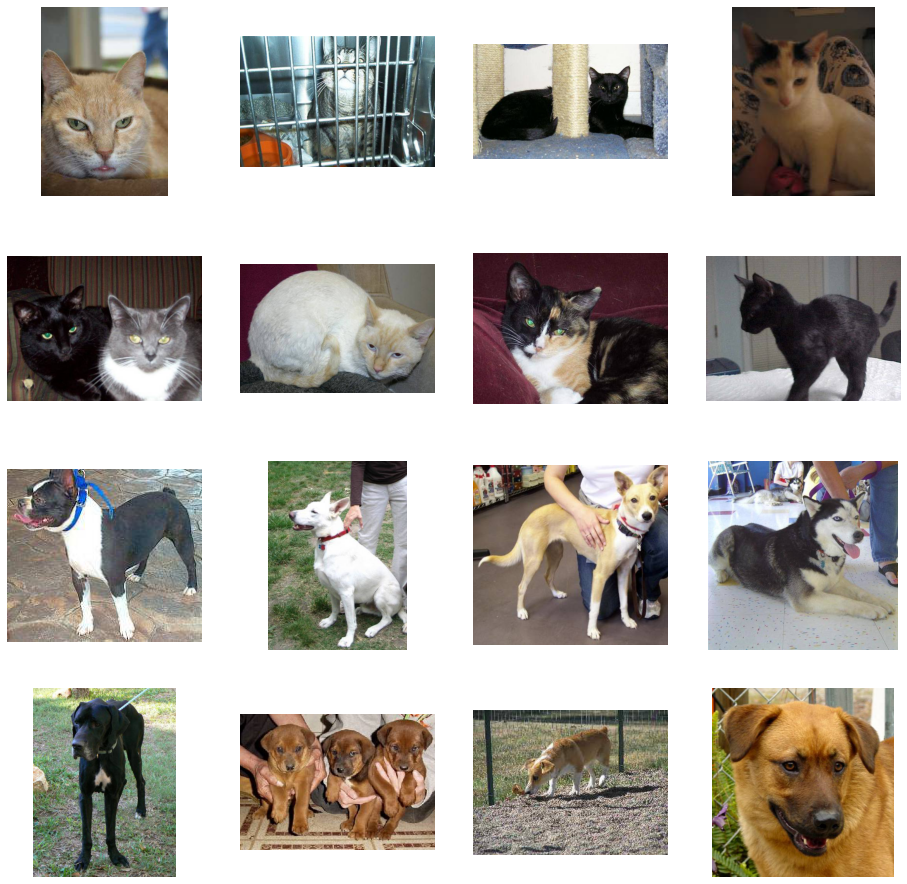

In [ ]:
# Take a look at some ofthe photos from the directories
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

index+=8

next_cat_pix = [os.path.join(train_cats_directory, fname) 
                for fname in train_cat_names[index-8:index] 
               ]

next_dog_pix = [os.path.join(train_dogs_directory, fname) 
                for fname in train_dog_names[index-8:index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(n_rows, n_cols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
     

# Create a Convolutional Binary Classifier

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [ ]:
# Check the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [ ]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# Train the Model
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))

validation_generator =  test_datagen.flow_from_directory( validation_directory,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Fit the Model and run the code 
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_steps=50)

Epoch 1/50
100/100 [==============================] - 75s 734ms/step - loss: 0.7128 - accuracy: 0.5180 - val_loss: 0.6920 - val_accuracy: 0.5130
Epoch 2/50
100/100 [==============================] - 74s 739ms/step - loss: 0.6916 - accuracy: 0.5425 - val_loss: 0.6909 - val_accuracy: 0.5280
Epoch 3/50
100/100 [==============================] - 71s 709ms/step - loss: 0.6807 - accuracy: 0.5650 - val_loss: 0.6715 - val_accuracy: 0.5800
Epoch 4/50
100/100 [==============================] - 73s 728ms/step - loss: 0.6779 - accuracy: 0.5730 - val_loss: 0.6732 - val_accuracy: 0.5640
Epoch 5/50
100/100 [==============================] - 71s 708ms/step - loss: 0.6730 - accuracy: 0.5940 - val_loss: 0.6517 - val_accuracy: 0.6020
Epoch 6/50
100/100 [==============================] - 73s 730ms/step - loss: 0.6488 - accuracy: 0.6295 - val_loss: 0.6356 - val_accuracy: 0.6220
Epoch 7/50
100/100 [==============================] - 72s 718ms/step - loss: 0.6182 - accuracy: 0.6540 - val_loss: 0.6256 - val_ac

# Test with new images.

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  
  if classes[0]>0:
    print(f"{fn} is a dog!")
    
  else:
    print(f"{fn} is a cat!")

KeyboardInterrupt: ignored

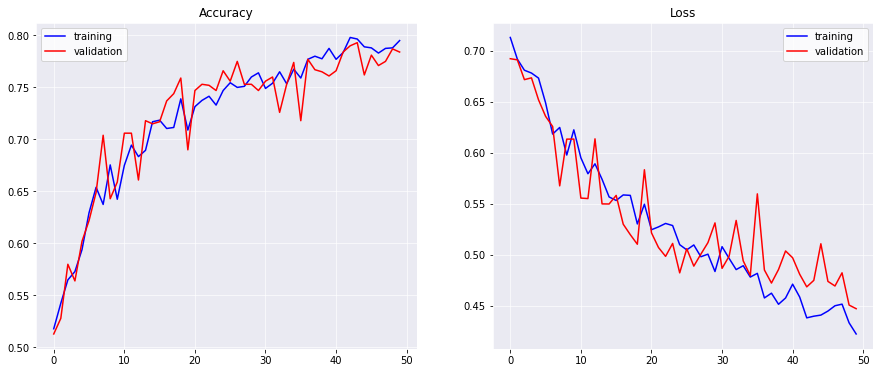

In [ ]:
# Display the conclusive iformation in a plot
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(15, 6), sharey=False)
ax[0].plot(epochs, acc,
          color='b',
          label='training')
ax[0].plot(epochs, val_acc,
          color='r',
          label='validation')
ax[0].set_title('Accuracy')
ax[0].grid(which='both', alpha=0.8, c='white')
ax[0].set_facecolor('#eaeaf2')
ax[0].spines['bottom'].set_color('white')
ax[0].spines['top'].set_color('white')
ax[0].spines['right'].set_color('white')
ax[0].spines['left'].set_color('white')
ax[0].legend()
ax[1].plot(epochs, loss,
          color='b',
          label='training')
ax[1].plot(epochs, val_loss,
          color='r',
          label='validation')
ax[1].set_title('Loss')
ax[1].grid(which='both', alpha=0.8, c='white')
ax[1].set_facecolor('#eaeaf2')
ax[1].spines['bottom'].set_color('white')
ax[1].spines['top'].set_color('white')
ax[1].spines['right'].set_color('white')
ax[1].spines['left'].set_color('white')
ax[1].legend()

plt.show()